# Laboratorio 1: Exploración y Visualización de Datos

Integrantes: Tomás Ubilla y Nahuel Won


## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


#### **Se recomienda fuertemente que no usen ChatGPT para resolver la actividad, ya que la experiencia de aprendizaje es mucho mayor si lo hacen por su cuenta.**

## Pongamonos en situación

Eres un **cientifico de datos** que trabaja en **Netflix**.

En los últimos años ha **crecido la cantidad usuarios que ven anime** en la plataforma, por lo que el equipo de contenido de Netflix ha decidido invertir en la producción de series de anime.

Tu jefe te ha pedido que **realices un análisis de los datos de las series de anime** para entender mejor el mercado y poder tomar decisiones informadas.

## Datos

Para realizar esta tarea, te han entregado un dataset con información de animes de la página **MyAnimeList** (MAL).

FUENTE: https://www.kaggle.com/datasets/azathoth42/myanimelist

Tenemos 2 archivos:
- `anime.csv`: Contiene 6 atributos: "title", "type", "source", "episodes", "airing" y "studio", que corresponden a información sobre el anime.
- `anime-stats.csv`: Contiene 4 atributos: "title", "score", "members" (número de usuarios que tienen el anime en su lista) y "favorites", que corresponden a estadísticas sobre la popularidad de cada anime.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Para que la siguiente celda funcione, los archivos CSV deben estar en la misma carpeta que este notebook.

In [ ]:
df_anime = pd.read_csv('anime.csv', encoding="UTF-8")
df_stats = pd.read_csv('anime-stats.csv', encoding="UTF-8")

También puedes cargarlos remotamente de un repositorio usando el link a los archivos:


In [4]:
df_anime = pd.read_csv('https://raw.githubusercontent.com/bacchus00/cositas/main/anime.csv', encoding="UTF-8")
df_stats = pd.read_csv('https://raw.githubusercontent.com/bacchus00/cositas/main/anime-stats.csv', encoding="UTF-8")

Cualquiera de estas 2 formas es válida para cargar los datos.

## Exploración básica


Para hacernos una idea de como se ven los datos, lo más usual es mostrar los primeros registros de cada dataset.

1. Muestre los primeros 5 registros de cada dataset.

In [6]:
df_anime.head()

,title,type,source,episodes,airing,studio
0,Inu x Boku SS,TV,Manga,12,False,David Production
1,Seto no Hanayome,TV,Manga,26,False,Gonzo
2,Shugo Chara!! Doki,TV,Manga,51,False,Satelight
3,Princess Tutu,TV,Original,38,False,Hal Film Maker
4,Bakuman. 3rd Season,TV,Manga,25,False,J.C.Staff


In [7]:
df_stats.head()

,title,score,members,favorites
0,Inu x Boku SS,7.63,283882,2809
1,Seto no Hanayome,7.89,204003,2579
2,Shugo Chara!! Doki,7.55,70127,802
3,Princess Tutu,8.21,93312,3344
4,Bakuman. 3rd Season,8.67,182765,2082


Siempre es útil conocer **cuántos datos y cuántas columnas** tenemos.

Esto es importante para poder responder
- ¿Tenemos suficientes datos?
- ¿Tenemos suficientes columnas?
- ¿Será muy caro computacionalmente trabajar con estos datos?

2. ¿Cuales son las dimensiones de cada dataset? en otras palabras, ¿cuántas filas y columnas tiene cada uno?

In [8]:
df_anime.shape

# Existen 
# filas: 14478 
# columnas: 6

(14478, 6)

In [9]:
df_stats.shape
# Existen 
# filas: 14478 
# columnas: 4

(14478, 4)

3. Además de ver algunos registros y las dimensiones, también es útil conocer algunas **estadísticas básicas** de los datos. Usa una función que nos permita **ver las estadísticas básicas** de **todas las columnas**.

In [10]:
df_anime.describe(include='all')

,title,type,source,episodes,airing,studio
count,14478,14478,14478,14478.000000,14478,8544
unique,14477,7,16,NaN,2,456
top,Hinamatsuri,TV,Unknown,NaN,False,Toei Animation
freq,2,4271,4210,NaN,14127,735
mean,NaN,NaN,NaN,11.308399,NaN,NaN
std,NaN,NaN,NaN,43.443451,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,12.000000,NaN,NaN


In [11]:
df_stats.describe(include='all')

,title,score,members,favorites
count,14478,14478.000000,1.447800e+04,14478.000000
unique,14477,NaN,NaN,NaN
top,Hinamatsuri,NaN,NaN,NaN
freq,2,NaN,NaN,NaN
mean,NaN,6.142482,2.296640e+04,311.649606
std,NaN,1.463981,7.498136e+04,2615.554211
min,NaN,0.000000,0.000000e+00,0.000000
25%,NaN,5.550000,2.450000e+02,0.000000
50%,NaN,6.370000,1.679500e+03,2.000000
75%,NaN,7.060000,1.037900e+04,23.000000


## Posibles errores en los datos

Al construir los datasets, es posible que se hayan generado **datos duplicados**, ya sea porque alguien ingresó dos veces la misma información, o porque se generó un error en la recolección de datos. Es importante **detectar y decidir qué hacer con estos datos**.

4.  ¿Existen filas duplicadas en alguno de los dataframes?


In [13]:
df_anime.duplicated()

# No existen duplicados en las filas
# Es posible comrpobar agregando .sum()

0        False
1        False
2        False
3        False
4        False
         ...  
14473    False
14474    False
14475    False
14476    False
14477    False
Length: 14478, dtype: bool

In [12]:
df_stats.duplicated()

# No existen duplicados en las filas 
# Es posible comrpobar agregando .sum()

0        False
1        False
2        False
3        False
4        False
         ...  
14473    False
14474    False
14475    False
14476    False
14477    False
Length: 14478, dtype: bool

Otro caso común es que existan **valores nulos** en los datos. Al igual que antes, es importante **identificarlos y decidir qué hacer con ellos**.

5.  ¿Hay filas con valores nulos en los dataframes?

In [14]:
df_anime.info()

# Existen filas que contienen en la columna 'studio'
# un valor nulo, esto para 5934 filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     14478 non-null  object
 1   type      14478 non-null  object
 2   source    14478 non-null  object
 3   episodes  14478 non-null  int64 
 4   airing    14478 non-null  bool  
 5   studio    8544 non-null   object
dtypes: bool(1), int64(1), object(4)
memory usage: 579.8+ KB


In [15]:
df_stats.info()

# No contiene filas con valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      14478 non-null  object 
 1   score      14478 non-null  float64
 2   members    14478 non-null  int64  
 3   favorites  14478 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 452.6+ KB


Consideremos que estamos en la situación en la que **decidimos eliminar los valores nulos**.

6. En caso de existir valores nulos, elimine las filas que los contengan. ¿Cuántas filas quedan en cada dataset luego de eliminar los valores nulos?

In [16]:
df_anime.dropna()

# Ya vimos que habia filas con nulos, al usar el comando '.dropna()'
# solo quedan 8544

,title,type,source,episodes,airing,studio
0,Inu x Boku SS,TV,Manga,12,False,David Production
1,Seto no Hanayome,TV,Manga,26,False,Gonzo
2,Shugo Chara!! Doki,TV,Manga,51,False,Satelight
3,Princess Tutu,TV,Original,38,False,Hal Film Maker
4,Bakuman. 3rd Season,TV,Manga,25,False,J.C.Staff
...,...,...,...,...,...,...
14461,Tobidashi wa Abunaizo! Mushi Mushi Mura no Kou...,OVA,Unknown,1,False,Toei Animation
14464,Mr. Men Little Miss,ONA,Picture book,0,True,Sanrio
14469,Ichinen Ikkumi,OVA,Unknown,1,False,Toei Animation
14470,Mushi Mushi Mura no Nakama-tachi: Minna Ii Tok...,OVA,Original,1,False,Toei Animation


In [17]:
df_stats.dropna()

# Queda igual ya que no posee rows con null values

,title,score,members,favorites
0,Inu x Boku SS,7.63,283882,2809
1,Seto no Hanayome,7.89,204003,2579
2,Shugo Chara!! Doki,7.55,70127,802
3,Princess Tutu,8.21,93312,3344
4,Bakuman. 3rd Season,8.67,182765,2082
...,...,...,...,...
14473,Gutchonpa Omoshiro Hanashi,5.50,76,0
14474,Geba Geba Shou Time!,4.60,90,0
14475,Godzilla: Hoshi wo Kuu Mono,0.00,1741,0
14476,Nippon Mukashibanashi: Sannen Netarou,6.00,32,0


## Juntemos nuestros datos

Con el objetivo de tener toda la información en un solo dataframe, y así poder responder preguntas más complejas, **unamos ambos dataframes**.

7. Junte ambos dataframes en uno solo **a través de la columna "title"** con un **inner join**, y **muestre los primeros 5 registros** de este nuevo dataframe.

In [150]:
df_innerJoin = pd.merge(df_anime, df_stats, on='title')
df_innerJoin.head()

,title,type,source,episodes,airing,studio,score,members,favorites,quality
0,Inu x Boku SS,TV,Manga,12,False,David Production,7.63,283882,2809,Intermedio
1,Seto no Hanayome,TV,Manga,26,False,Gonzo,7.89,204003,2579,Intermedio
2,Shugo Chara!! Doki,TV,Manga,51,False,Satelight,7.55,70127,802,Intermedio
3,Princess Tutu,TV,Original,38,False,Hal Film Maker,8.21,93312,3344,Bueno
4,Bakuman. 3rd Season,TV,Manga,25,False,J.C.Staff,8.67,182765,2082,Bueno


## Obtengamos información de los datos

Ahora tenemos que entender un poco más sobre los datos que tenemos, para que el equipo de contenido pueda tomar decisiones informadas.

Para esto, tu jefe te ha solicitado las siguientes tareas:

8. "Necesitamos saber cuales son los animes más populares." Para esto, **entrega los 5 animes con más miembros** (número de usuarios que tienen el anime en su lista).

In [149]:
df_innerJoin.sort_values(by="members", ascending=False).head()

,title,type,source,episodes,airing,studio,score,members,favorites,quality
7914,Death Note,TV,Manga,37,False,Madhouse,8.67,1456378,88696,Bueno
8124,Shingeki no Kyojin,TV,Manga,25,False,Wit Studio,8.49,1345842,64032,Bueno
6297,Sword Art Online,TV,Light novel,25,False,A-1 Pictures,7.64,1301616,50042,Intermedio
2555,Fullmetal Alchemist: Brotherhood,TV,Manga,64,False,Bones,9.25,1199091,106895,Bueno
8864,One Punch Man,TV,Web manga,12,False,Madhouse,8.73,1020754,30747,Bueno


9. Esta información puede ser muy valiosa para identificar alguna característica en común de los animes más populares. **Realiza una observación de alguna característica en común, o algo relevante, de los 5 animes** obtenidos en la pregunta anterior.

Tienen un Score bastante alto, con el mas bajo de 7.64 y el mas alto de 9.25 con una media de aproximadamente 8.6, además todos son de tipo 'TV'.
Además no existe relacion clara entre 'members' y 'favorites', el caso para aquellos quienes superaron el score 9.0 tienen una cantidad de members y favorites similares, en cambio para los demas hubo gente que le gusto y no lo agrego, lo cual nos dice que 'favorites' no es una columna que nos otorgue mucha información sobre la recepcion a publico.

10. Además de un anime popular, el equipo te dice que quiere hacer un anime de mucha calidad, osea, que sea muy bien evaluado, en particular buscan que tenga un score mayor a 9.0. **Entrega los con score mayor a 9.0**.

In [119]:
df_innerJoin[df_innerJoin["score"] > 9.0][["title", "members", "score"]]
# serie booleana (mascara) => df_innerJoin["score"] > 9.0
# aplicar la mascara al dataframe filtra lo que queriamos jijija

,title,members,score
418,Hunter x Hunter (2011),720920,9.11
548,Manichi ga Tsurai Kimochi Wakarimasu ka: Yurus...,29,10.00
1028,Kimi no Na wa.,730076,9.19
1252,Gintama°,198744,9.15
1307,3-gatsu no Lion 2nd Season,85744,9.10
2555,Fullmetal Alchemist: Brotherhood,1199091,9.25
2783,Clannad: After Story,607387,9.01
3000,Steins;Gate,1010330,9.14
3130,Okaachan Gomen ne,73,9.20
5784,Gintama&#039;: Enchousen,123572,9.07


11. Ahora tu equipo desea analizar a la competencia. Para esto **entrega los 5 estudios de anime con mejor score promedio entre sus animes**.

In [ ]:
df_innerJoin.groupby('studio')['score'].mean().sort_values(ascending=False).head()

,studio,score
229,Odolttogi,7.870000
41,B&amp;T,7.820000
113,Fuji TV,7.730000
362,Studio Rikka,7.688571
79,D &amp; D Pictures,7.635000


12. Después de que te preguntaran por los animes que tienen mejor score, se te ocurre crear una columna que indique cuales animes son "buenos". Para esto, el área de producto te indica que un "mal" anime tiene score bajo 4.0, uno "intermedio" tiene score entre 4.0 y 8.0, y uno "bueno" tiene score sobre 8.0. **Usa el método apply para crear una nueva columna "quality" que tenga como valor "Malo", "Intermedio" o "Bueno" según la definición anterior. Luego, muestra los 5 primeros registros**

In [88]:
df_stats['quality'] = df_stats['score'].apply(lambda x: 'Malo' if x < 4.0 else 'Intermedio' if x <= 8.0 else 'Bueno')
df_stats.head()

,title,score,members,favorites,quality
0,Inu x Boku SS,7.63,283882,2809,Intermedio
1,Seto no Hanayome,7.89,204003,2579,Intermedio
2,Shugo Chara!! Doki,7.55,70127,802,Intermedio
3,Princess Tutu,8.21,93312,3344,Bueno
4,Bakuman. 3rd Season,8.67,182765,2082,Bueno


13. Rodrigo, un miembro del equipo, te dice: "Si deseamos que la gente nos tenga en sus favoritos, ¿qué tipo de anime deberíamos hacer? Para cada tipo de anime (TV, OVA, Movie, etc) podríamos sumar la cantidad de favoritos, y hacer el tipo de anime que tenga la suma más grande". Sin embargo, tú te percatas de que **hay un problema con lo que él propone**. ¿Cuál es este problema?

Hace unas preguntas atras veniamos viendo que favoritos no es una medida adecuada para asegurar una recepcion de publico al contenido. 
El problema con agrupar por tipo y luego sumar por favoritos es que si hay mas tipos de anime en una categoria mas que en otra (ex: TV>OVA), el sumar favoritos pierde importancia respecto porque habran mucho mas favoritos numericamente para un tipo de anime que otro de menor, es una posibilidad que no puede ser destimada.

14. Para mostrarle a Rodrigo el problema con la solución que él propuso, **entrega la cantidad de animes por cada tipo**.

In [151]:

df_anime['type'].value_counts().reset_index()

# Codigos de apoyo:
#=> (pd.merge(df_anime, df_stats, on="title").groupby('type')['members'].sum())
#=> (pd.merge(df_anime, df_stats, on="title").groupby('type')['favorites'].sum())

# Los tipos TV al ser mas tienen mas miembros para aportar a sus contadores
# Si se revisa members y favorites se puede hacer mas notoria la diferencia, además que los ordenes en contador
# Son diferentes al ser metricas diferentes dependiendo del contexto a asumir cual es realmente relevante
# pero ya sabemos que "favorites" no es muy confiable


,type,count
0,TV,4271
1,OVA,3612
2,Movie,2624
3,Special,1948
4,ONA,1144
5,Music,849
6,Unknown,30


15. Tu jefe te dice que tuvo una visión en un sueño, te dice que sabe como hacer el anime más famoso. Quiere hacer un anime de tipo OVA, donde la fuente (columna source) sea Novel. **Entrega las columnas title, members, favorites, y quality de todos los animes que cumplan con estas características**.

In [ ]:
df_jefe = df_innerJoin[(df_innerJoin['type'] == 'OVA') & (df_innerJoin['source'] == 'Novel')][['title','members', 'favorites', 'quality']]
df_jefe

,title,members,favorites,quality
641,Mobile Suit Gundam Unicorn,52688,1066,Bueno
923,H. P. Lovecraft&#039;s The Dunwich Horror and ...,2099,4,Intermedio
1390,Ginga Eiyuu Densetsu Gaiden (1999),10381,15,Bueno
1599,Tamagawa Kyoudai,28,0,Intermedio
2109,Vatican Kiseki Chousakan OVA,2883,2,Intermedio
2552,X Densha de Ikou,1549,8,Intermedio
3065,The Hakkenden,4982,10,Intermedio
3905,Lesson XX,5424,4,Intermedio
4160,Kubikiri Cycle: Aoiro Savant to Zaregototsukai,44763,290,Intermedio
4507,Boku no Sexual Harassment,11912,45,Intermedio


16. Para verificar si tu jefe tiene sueños extraños, o si realmente tiene una visión, **calcula y muestra el promedio de los miembros, el promedio de los favoritos, y la categoría de quality más repetida** de los animes obtenidos en la pregunta anterior.

In [153]:
print(f"mean members: {df_jefe['members'].mean()}")
print(f"mean favorites: {df_jefe['favorites'].mean()}")
print(f"mode quality: {df_jefe['quality'].mode()}")

mean members: 15462.386363636364
mean favorites: 249.8409090909091
mode quality: 0    Intermedio
Name: quality, dtype: object


# Visualicemos los datos

17. Muestre el histograma de todas las puntuaciones de animes

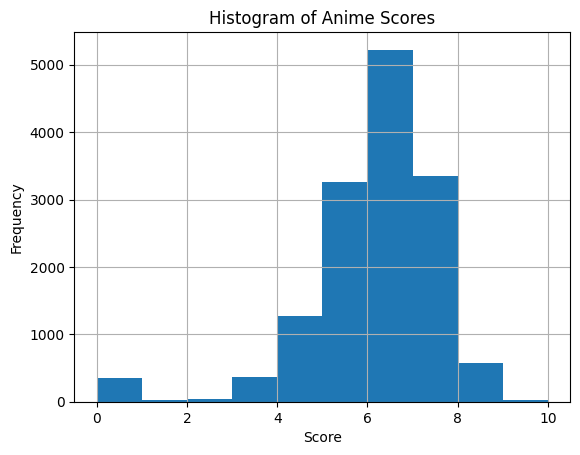

In [81]:
hist = df_stats['score'].hist(bins = 10)

plt.title('Histogram of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


18. Muestre la densidad de puntajes para los principales tipos de anime (TV, OVA, Movie)

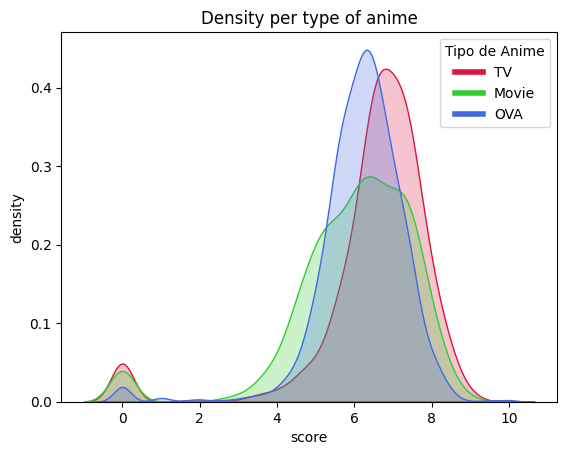

In [161]:
plt.title("Density per type of anime")

sns.kdeplot(data=df_innerJoin[df_innerJoin["type"] == "TV"], x="score", color="crimson", fill=True)
sns.kdeplot(data=df_innerJoin[df_innerJoin["type"] == "Movie"], x="score", color="limegreen", fill=True)
sns.kdeplot(data=df_innerJoin[df_innerJoin["type"] == "OVA"], x="score", color="royalblue", fill=True)

plt.xlabel("score")
plt.ylabel("density")

plt.legend(title="Tipo de Anime", loc="upper right", labels=["TV", "Movie", "OVA"], handles=[
    plt.Line2D([0], [0], color='crimson', lw=4),
    plt.Line2D([0], [0], color='limegreen', lw=4),
    plt.Line2D([0], [0], color='royalblue', lw=4)
])

plt.show()

19. ¿Cuál tipo de anime es más exitoso? ¿Se está tomando en cuenta la cantidad de animes por tipo al afirmar eso?

R: Se esperaría que el más exitoso fuese el tipo de anime que tenga su densidad lo más derecha posible ya que esto simbolizaria que su score tiene una mayor densidad de score promedio. 

Tecnicamente el más exitoso es TV.

Aun así esto no es suficiente para remarcar que tipo de anime es mas exitoso debido a que no se esta considerando la cantidad de tipos de anime por distribución lo que genera un mal muestreo de los datos y conclusiones, ya que hemos visto que la cantidad de cada score acumulado por tipo de anime es distinto, siendo TV la que tiene mayor cantidad de registros con mayor representatividad frente a los demás, pero todo esto por el sesgo de muestreo.

Y eso es todo por hoy :)


![](https://i.imgur.com/ghKLs78.jpeg)